In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
from IPython.display import SVG

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,164,177,163,0,0,1,0,0,0,0


In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/test.csv')
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0


In [ ]:
labels = {0: "T-shirt", 1: "Trouser", 2: "Pullover", 3: "Shoes", 4: "Bag"}

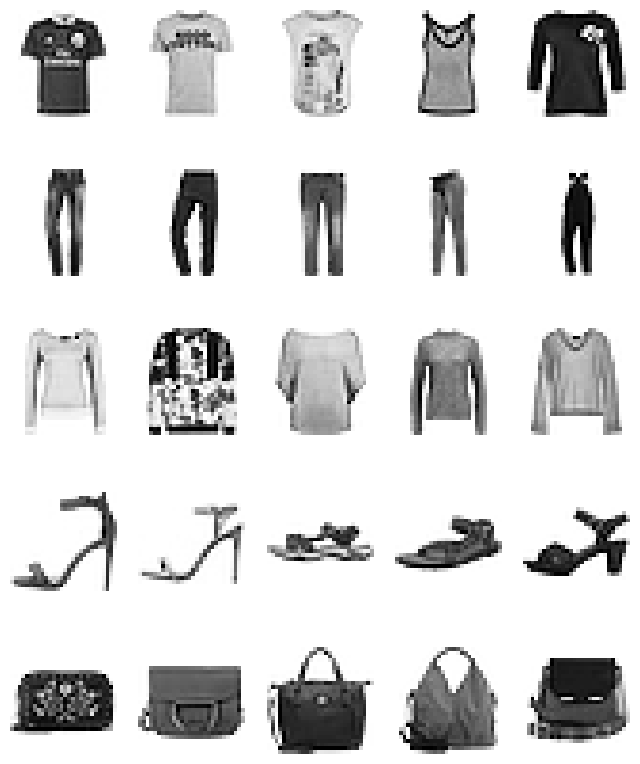

In [ ]:
def sample_images_data(data):
    sample_images = []
    for k in labels.keys():
        # Get five samples for each category
        samples = data[data["label"] == k].head(5)
        for j, s in enumerate(samples.values):
            img = np.array(samples.iloc[j, 1:]).reshape(28,28)
            sample_images.append(img)
    return sample_images

test_sample_images = sample_images_data(test_data)

def plot_sample_images(data_sample_images, cmap="Greys"):
    num_rows, num_cols = 5, 5
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 10))

    for i in range(num_rows):
        for j in range(num_cols):
            index = i * num_cols + j
            if index < len(data_sample_images):
                axes[i, j].imshow(data_sample_images[index], cmap=cmap)
                axes[i, j].axis('off')
            else:
                axes[i, j].axis('off')

    plt.show()

plot_sample_images(test_sample_images)

In [ ]:
def data_preprocessing(raw_data):
    num_classes = 5

    # Extract labels and convert to one-hot encoding
    labels = tf.keras.utils.to_categorical(raw_data.label, num_classes)

    # Extract pixel values
    pixel_values = raw_data.values[:, 1:]

    # Reshape pixel values
    num_images = raw_data.shape[0]
    reshaped_images = pixel_values.reshape(num_images, 28, 28, 1)

    # Normalize pixel values to [0, 1]
    normalized_images = reshaped_images / 255.0

    return normalized_images, labels


X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:",x_train.shape[0], x_train.shape[1:4])
print("Validation set size:",x_val.shape[0], x_val.shape[1:4])
print("Test set size:",X_test.shape[0]," columns:", X_test.shape[1:4])

Training set size: 24000 (28, 28, 1)
Validation set size: 6000 (28, 28, 1)
Test set size: 5000  columns: (28, 28, 1)


In [ ]:
cnn = Sequential()
# first layer
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(BatchNormalization()) # to make training of artificial neural networks faster and more stable
# second layer
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
# third layer
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))
# fourth layer
cnn.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

# to interpret the features
cnn.add(Dense(512, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

cnn.add(Dense(128, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

cnn.add(Dense(5, activation='softmax'))

In [ ]:
cnn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                        

In [ ]:
history = cnn.fit(x_train, y_train,
          batch_size = 256,
          epochs = 100,
          validation_data = (x_val, y_val))

Epoch 1/100
94/94 [==============================] - 2s 25ms/step - loss: 0.0622 - accuracy: 0.9798 - val_loss: 0.0746 - val_accuracy: 0.9782
Epoch 2/100
94/94 [==============================] - 2s 23ms/step - loss: 0.0568 - accuracy: 0.9821 - val_loss: 0.0712 - val_accuracy: 0.9768
Epoch 3/100
94/94 [==============================] - 2s 26ms/step - loss: 0.0568 - accuracy: 0.9814 - val_loss: 0.0578 - val_accuracy: 0.9823
Epoch 4/100
94/94 [==============================] - 2s 25ms/step - loss: 0.0535 - accuracy: 0.9831 - val_loss: 0.0542 - val_accuracy: 0.9843
Epoch 5/100
94/94 [==============================] - 2s 25ms/step - loss: 0.0474 - accuracy: 0.9844 - val_loss: 0.0562 - val_accuracy: 0.9840
Epoch 6/100
94/94 [==============================] - 2s 25ms/step - loss: 0.0470 - accuracy: 0.9846 - val_loss: 0.0529 - val_accuracy: 0.9822
Epoch 7/100
94/94 [==============================] - 2s 23ms/step - loss: 0.0431 - accuracy: 0.9858 - val_loss: 0.0528 - val_accuracy: 0.9825
Epoch 

In [ ]:
# save model
cnn.save('model_100.h5')

In [ ]:
score = cnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07347355037927628
Test accuracy: 0.9869999885559082


In [ ]:
!pip install nnv

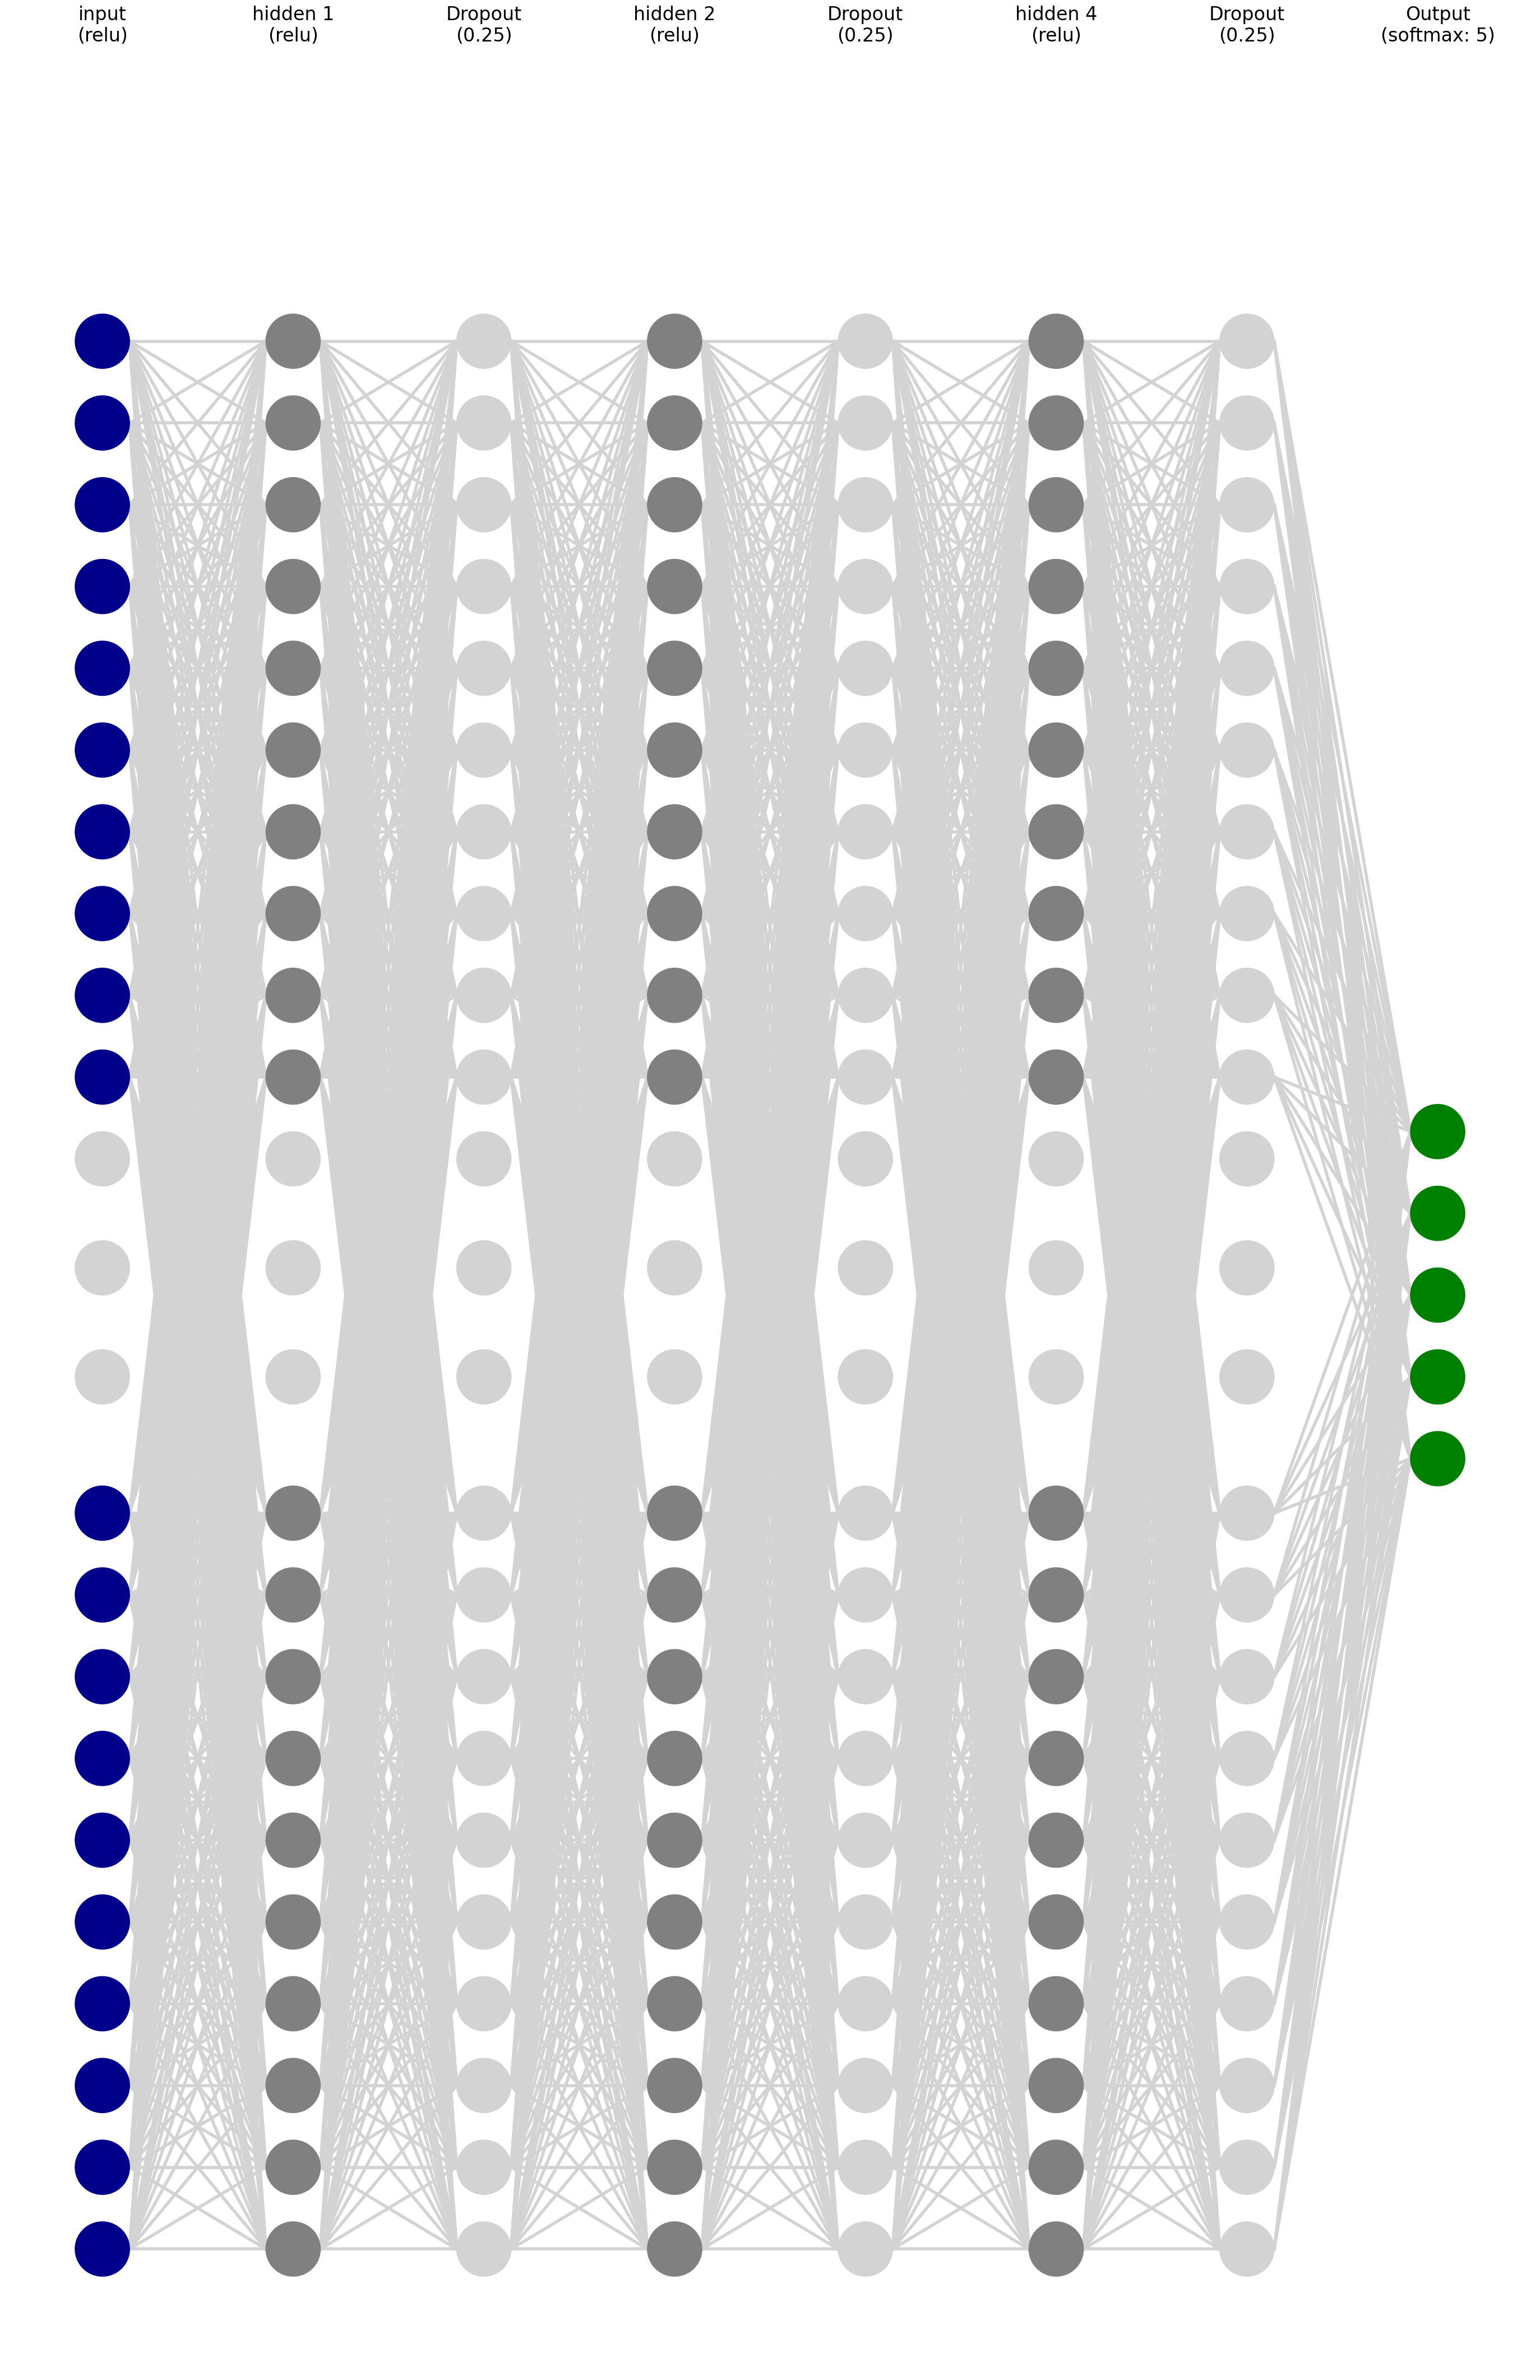

(<Figure size 10000x5000 with 1 Axes>, <Axes: >)

In [ ]:
from nnv import NNV
plt.rcParams["figure.figsize"] = 100,50

layersList = [
    {"title":"input\n(relu)", "units": 784, "color": "darkBlue"},
    {"title":"hidden 1\n(relu)", "units": 32},
    {"title":"Dropout\n(0.25)", "units": 32,"color":"lightGray"},
    {"title":"hidden 2\n(relu)",  "units": 64},
    {"title":"Dropout\n(0.25)", "units": 64,"color":"lightGray"},
    {"title":"hidden 4\n(relu)",  "units": 128},
    {"title":"Dropout\n(0.25)", "units": 128,"color":"lightGray"},
    {"title":"Output\n(softmax: 5)", "units": 5,"color": "Green"},
]

NNV(layersList, spacing_layer=5, max_num_nodes_visible=20, node_radius=1, font_size=24).render()

In [ ]:
from sklearn.metrics import confusion_matrix
from itertools import product

#Create Multiclass Confusion Matrix

preds = cnn.predict(X_test)
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(preds,axis=1))

plt.figure(figsize=(8,8))
plt.imshow(cm,cmap=plt.cm.Reds)
plt.title('Confusion Matrix - CNN')
plt.colorbar()
plt.xticks(np.arange(5), labels, rotation=90)
plt.yticks(np.arange(5), labels)

for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
    horizontalalignment="center",
    color="white" if cm[i, j] > 500 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label');

NameError: name 'cnn' is not defined

In [ ]:
from PIL import Image
import math

def rotate_image(input_path, angle):
    # Open the image
    img = Image.open(input_path)

    # Rotate the image by the specified angle
    rotated_img = img.rotate(angle, resample=Image.BICUBIC, expand=True)

    return rotated_img

In [ ]:
import cv2

def is_gray(r, g, b, threshold=15):
    return abs(r - g) < threshold and abs(r - b) < threshold and abs(g - b) < threshold

def extract_square(path):
    image = cv2.imread(path)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            r, g, b = image[i][j]
            # Apply color-based filtering
            if b > 80 and not is_gray(r, g, b):
                image[i][j] = [200, 200, 200]
            # Increase brightness for non-gray pixels
            r, g, b = image[i][j]
            avg = (r + g + b) / 3
            if avg > 200:
                image[i][j] = [avg - 200, avg - 200, avg - 200]
            # Increase brightness for bright pixels
            r, g, b = image[i][j]
            if avg > 70:
                image[i][j] = [int(min(avg + 100, 200)), int(min(avg + 100, 200)), int(min(avg + 100, 200))]

    # Convert the input image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold to get just the grayscale square (INVERTED)
    thresh_gray = cv2.threshold(gray, thresh=70, maxval=255, type=cv2.THRESH_OTSU)[1]

    contours, hierarchy = cv2.findContours(thresh_gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    max_area = -np.inf
    min_x = np.inf
    min_y = np.inf
    max_x = -np.inf
    max_y = -np.inf

    for contour in contours:
        area = cv2.contourArea(contour)
        max_area = max(max_area, area)
        if 2000 < area < 60000: #qualified contour
            for point in contour:
                x, y = point.T
                x = x[0]
                y = y[0]
                min_x = min(min_x, x)
                min_y = min(min_y, y)
                max_x = max(max_x, x)
                max_y = max(max_y, y)

    original = cv2.imread(path)
    return original[min_y:max_y, min_x:max_x]

In [ ]:
from PIL import Image

def invert_image(image_path):
  # Load the image
  image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  # Invert the pixel values
  inverted_image = cv2.bitwise_not(image)
  return inverted_image

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np

def load_and_prepare_image(filename, target_size=(28, 28)):
    # Load the image
    img = load_img(filename, grayscale=True, target_size=target_size)
    # Convert to array
    img_array = img_to_array(img)
    # Reshape into a single sample with 1 channel
    img_array = np.expand_dims(img_array, axis=0)
    # Prepare pixel data
    img_array = img_array.astype('float32') / 255.0
    return img_array

In [ ]:
def predict_class(model, img):
    # Predict the class
    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions[0])
    return predicted_class_index

In [ ]:
import cv2
#test:
# Load the model
model = load_model('model_100.h5')
input_path='test.jpg'

# Define the rotation angles
rotation_angles = [0, 45, 90, 135, 180, 225, 270, 315]

# Predict the class for each rotated image
class_predictions = []
for angle in rotation_angles:

    # Rotate
    rotated_img=rotate_image(input_path,angle)
    # Save the rotated image
    rotated_path=f'testrotated{angle}.jpg'
    rotated_img.save(rotated_path)

    #crop
    cropped_img=extract_square(rotated_path)
    # Save the cropped image
    cropped_path=f'testcropped{angle}.jpg'
    cv2.imwrite(cropped_path, cropped_img)

    #invert image(negative)
    inverted_img=invert_image(cropped_path)
    #save the inverted image
    inverted_path=f'testinverted{angle}.jpg'
    cv2.imwrite(inverted_path, inverted_img)

    #prepare the cropped image for model input
    model_input=load_and_prepare_image(rotated_path)

    # Pass the prepared image through your CNN model to predict the class
    class_prediction = predict_class(model,model_input)

    # Append the class prediction to the list
    class_predictions.append(class_prediction)

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 38ms/step


In [ ]:
import numpy as np
print(class_predictions)

[3, 4, 4, 4, 4, 4, 4, 4]


In [ ]:
def tester():
    # Specify the image file path
    image_file = 'test.jpg'

    # Load and prepare the image
    img = load_and_prepare_image(image_file)

    # Load the model
    model = load_model('model_100.h5')

    # Predict the class
    predicted_class = predict_class(model, img)

    # Print the predicted class
    print(f"Predicted Class Index: {predicted_class}")

# Entry point, run the example
tester()

1/1 [==============================] - 0s 175ms/step
Predicted Class Index: 4
